In [1]:
import pandas as pd
import plotly.express as px

In [42]:
df = pd.read_excel("C:/Users/thiag/Documents/1 -Mestrado/SprintFinal/Defesa/Results/consolidado/MAE/boot.xlsx")
df["ci_inf"] = (df["mean"] - df["sup"])
df["ci_sup"] = (df["inf"] - df["mean"])
df.head()

,file,n_obs,n_ma,n_fold_ts,n_ts,model,mean,sup,inf,ci_inf,ci_sup
0,MAE & n_obs__100 & n_ma__0 & n_fold_ts__85 & n...,100,0,85,2,ARIMA,0.735014,0.693282,0.780176,0.041732,0.045162
1,MAE & n_obs__100 & n_ma__0 & n_fold_ts__85 & n...,100,0,85,2,VAR,0.779155,0.740454,0.827433,0.038702,0.048278
2,MAE & n_obs__100 & n_ma__0 & n_fold_ts__85 & n...,100,0,85,2,VEC,0.847400,0.799527,0.902322,0.047873,0.054922
3,MAE & n_obs__100 & n_ma__0 & n_fold_ts__85 & n...,100,0,85,3,ARIMA,0.747558,0.700584,0.788387,0.046973,0.040830
4,MAE & n_obs__100 & n_ma__0 & n_fold_ts__85 & n...,100,0,85,3,VAR,0.781117,0.734908,0.829889,0.046209,0.048772


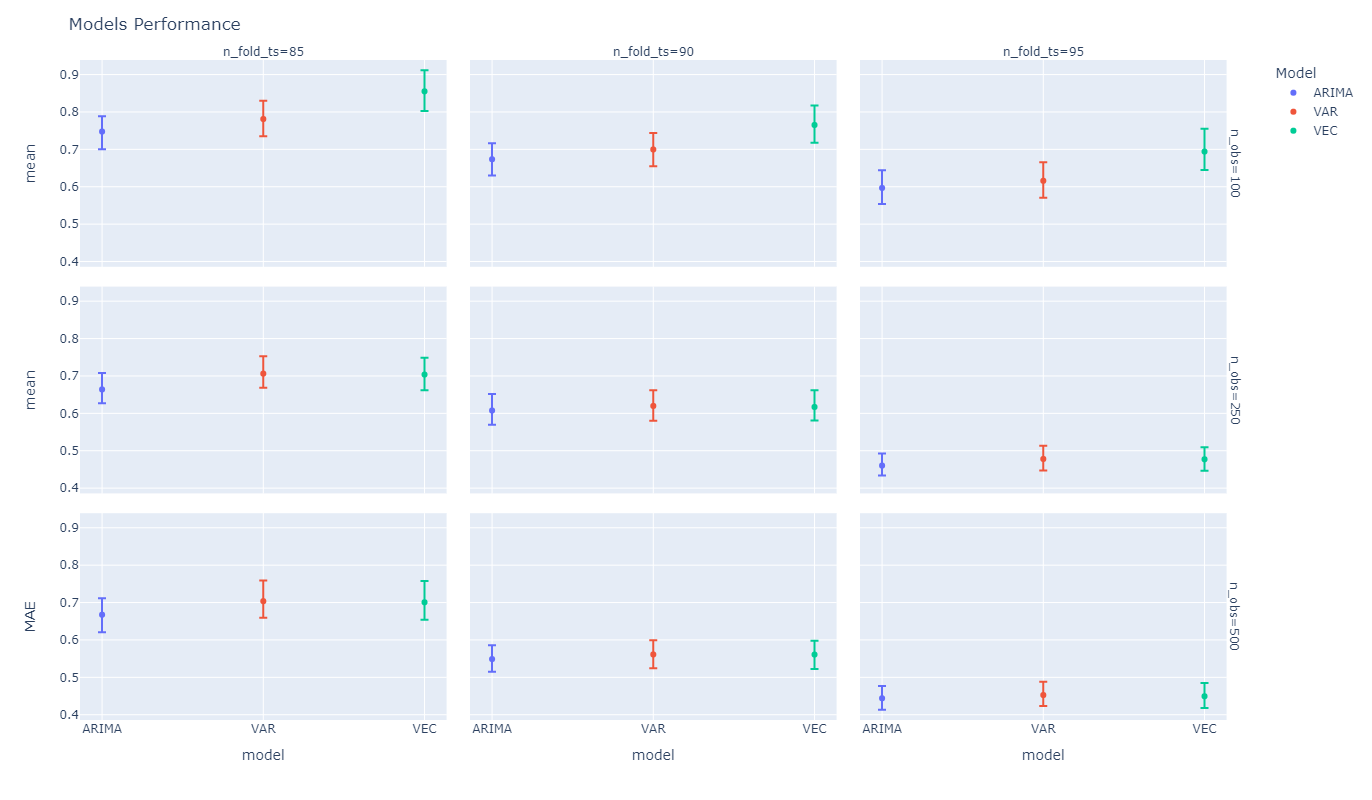

In [72]:
filter_select = (df.n_ts==3) & (df.n_ma==0)
boot_df_ci_filter = df.loc[filter_select].copy()

fig = px.scatter(boot_df_ci_filter, x="model", y="mean", color="model", facet_col="n_fold_ts",facet_row="n_obs",error_y="ci_sup",error_y_minus="ci_inf")
fig.update_layout(width=1200, height=800)
fig.update_layout(title="Models Performance",yaxis_title="MAE",legend_title="Model")
fig.show()

In [74]:
boot_df_ci_filter

,file,n_obs,n_ma,n_fold_ts,n_ts,model,mean,sup,inf,ci_inf,ci_sup


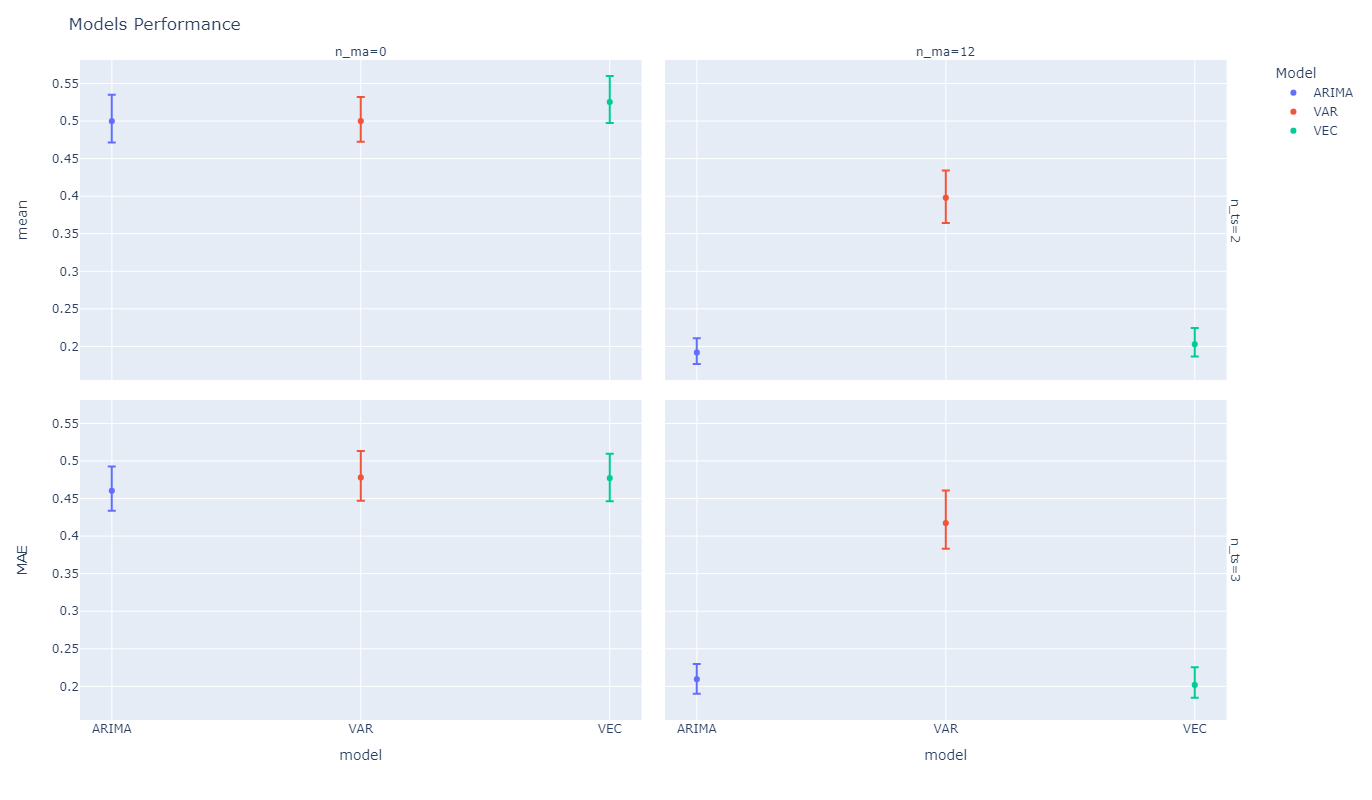

In [78]:
filter_select = (df.n_fold_ts==95) & (df.n_obs==250)
boot_df_ci_filter = df.loc[filter_select].copy()

fig = px.scatter(boot_df_ci_filter, x="model", y="mean", color="model", facet_col="n_ma",facet_row="n_ts",error_y="ci_sup",error_y_minus="ci_inf")
fig.update_layout(width=1200, height=800)
fig.update_layout(title="Models Performance",yaxis_title="MAE",legend_title="Model")
fig.show()